In [65]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries for linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Saving model
import joblib 

In [66]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. Regression Practice Projects - ED & ML\Apartment Price\apartment_prices.csv")
df.head()

,Squaremeter,Price
0,70,351
1,72,39
2,91,473
3,58,282
4,49,3


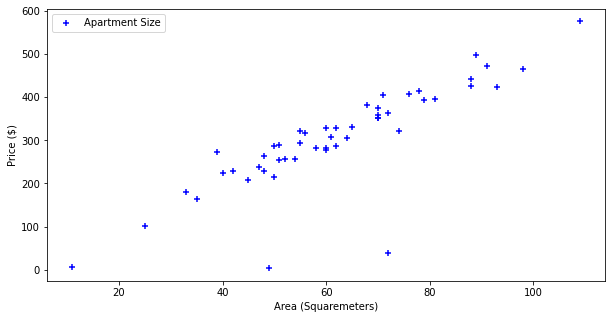

In [67]:
# Getting an idea of out data via a scatter plot
%matplotlib inline 

# Setting figure size
plt.figure(figsize=(10,5))

# Labelling axis
plt.xlabel('Area (Squaremeters)') # Setting label for the x axis
plt.ylabel('Price ($)') # Setting label for the y axis

# Plotting general data - scatter
plt.scatter(df.Squaremeter, df.Price, color='blue', marker='+', label = 'Apartment Size') # Plotting graph

#Include labels
plt.legend()

We can see two obvious outliers:
    - ~47 Squaremeter, ~$0
- ~71 Squaremeter, ~$60

In [68]:
# Splitting data
x = df['Squaremeter']
y = df['Price']
x = x.values.reshape(-1,1) # Reshape the "x" values to be 2d arrays - required for fitting the model

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #Can add ,random_state = 10) to keep samples the same

In [69]:
# Fit Model 
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# joblib.dump(model_variable_name, "model_save_name")
joblib.dump(reg, '(4.1) Apartment Prices - Regression Practice - Model')

['(4.1) Apartment Prices - Regression Practice - Model']

In [71]:
# new_model_variable = joblib.load("model_save_name")
## AP = Apartment Prices
AP_model = joblib.load('(4.1) Apartment Prices - Regression Practice - Model')

In [72]:
# Automatic prediction
AP_model.predict(x_test) # syntax; reg.predict([[x], [x], [x]]) or reg.predict([[x]]) or reg.predict(x)

array([380.86352003, 201.83363851, 370.9174155 , 167.02227265,
       216.7527953 , 346.05215418, 301.2946838 , 351.02520644,
       445.51319947, 430.59404268])

Now let's look at getting the point for line of best fit:

y = mx + b

- m = The coefficient, "co" meaning joint - in this case with the variable "x"
- b = The intercept


In [73]:
# Manual prediction - how it works essentially
coefficient = AP_model.coef_ # m
intercept = AP_model.intercept_ # b

print(f"The coefficient is: {coefficient}")
print(f"The intercept is: {intercept}")
(coefficient * x_test) + intercept # Multiply by a random vaiable 

The coefficient is: [4.97305226]
The intercept is: -7.034556609227593


array([[380.86352003],
       [201.83363851],
       [370.9174155 ],
       [167.02227265],
       [216.7527953 ],
       [346.05215418],
       [301.2946838 ],
       [351.02520644],
       [445.51319947],
       [430.59404268]])

In [74]:
reg.score(x_test,y_test) # The score is 92.3% 

0.9230077945076758

The score of the model fluctuates. We have to find a way, where our test data produces the highest correlative score.

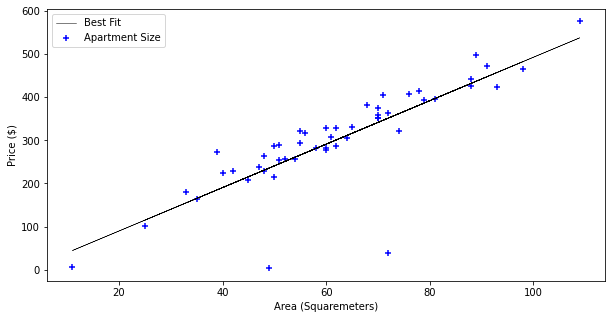

In [63]:
%matplotlib inline

# Set figure size
plt.figure(figsize=(10, 5))

# Assigning labels to axis
plt.xlabel('Area (Squaremeters)') # x axis
plt.ylabel('Price ($)') # y axis

# Plotting general data - scatter
plt.scatter(df.Squaremeter, df.Price, color='blue', marker='+', label = 'Apartment Size') 

# Plotting line of best fit - line.
## Syntax; plt.plot(x, reg.predict(x)...) : reg.predict(x) = y = m*x + b
plt.plot(df.Squaremeter, AP_model.predict(x),color='black', label = 'Best Fit', linewidth = 0.5)

# Include labels
plt.legend()